<a href="https://colab.research.google.com/github/AditiSatsangi/Identification-of-medicina-plants-using-CNN/blob/main/Plants_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [58]:
import numpy as np
import pandas as pd

In [59]:
#Install kaggle API client
!pip install -q kaggle

In [60]:
!mkdir  ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
!mv kaggle.json /root/.kaggle/


'mv' is not recognized as an internal or external command,
operable program or batch file.


In [62]:
#to set permissions
!chmod 600 /root/.kaggle/kaggle.json


'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [63]:
#list all available datasets
!kaggle datasets list

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kanya\AppData\Local\Programs\Python\Python312\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\kanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\__init__.py", line 7, in <module>
    api.authenticate()
  File "C:\Users\kanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\kanya\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


# Downloading dataset

In [64]:
!pip install tensorflow-hub


In [65]:
!pip install tensorflow-datasets


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import numpy as np

In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np

def load_and_preprocess_images(dataset_path, image_size=(128, 128)):
    images = []
    labels = []

    class_names = sorted(os.listdir(dataset_path))  # Get sorted list of class directories
    class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}  # Map class name to an integer label

    # Iterate through class directories
    for class_dir in class_names:
        class_path = os.path.join(dataset_path, class_dir)
        class_label = class_to_label[class_dir]  # Get the label for the class

        # Iterate through images in the class directory
        for image_file in os.listdir(class_path):
            if image_file.lower().endswith(('png', 'jpg', 'jpeg')):  # Process only image files
                image_path = os.path.join(class_path, image_file)

                # Read and preprocess the image
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image: {image_path}")
                    continue  # Skip this image if it fails to load
                
                image = cv2.resize(image, image_size)
                image = image.astype(np.float32) / 255.0  # Normalize pixel values

                # Append the image and label to lists
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

# Load and preprocess the images
dataset_path = 'D:\\medicinal-plant-identification\\Code\\indian-medicinal-leaves-dataset\\Indian Medicinal Leaves Image Datasets\\Medicinal Leaf dataset'

if not os.path.exists(dataset_path):
    print(f"Dataset path does not exist: {dataset_path}")
else:
    images, labels = load_and_preprocess_images(dataset_path)

    # Check shapes
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

    # Convert to TensorFlow Dataset
    data = tf.data.Dataset.from_tensor_slices((images, labels))

    # Batch the dataset
    data = data.batch(32)  # You can adjust the batch size here

    # Now you can use .take(1) to access one batch from the dataset
    for images_batch, labels_batch in data.take(1):  # Take one batch from the dataset
        print(f"Labels batch shape: {labels_batch.shape}")
        print(f"Images batch shape: {images_batch.shape}")




# **Transfer Learning with MobileNet Model**

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Constants
IMAGE_RES = 224
BATCH_SIZE = 32

# Load the dataset for training (with validation split)
data = tf.keras.utils.image_dataset_from_directory(
    'D:\\medicinal-plant-identification\\Code\\indian-medicinal-leaves-dataset\\Indian Medicinal Leaves Image Datasets\\Medicinal Leaf dataset',
    image_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    validation_split=0.2,  # 20% of the data will be used for testing
    subset="training",     # Specify "training" to get the training subset
    seed=42,
    label_mode='int'
)

# Get number of examples and classes
num_examples = data.cardinality().numpy()
num_classes = len(data.class_names)

# Load the dataset for validation (testing data) using the same validation_split
testing_data = tf.keras.utils.image_dataset_from_directory(
    'D:\\medicinal-plant-identification\\Code\\indian-medicinal-leaves-dataset\\Indian Medicinal Leaves Image Datasets\\Medicinal Leaf dataset',
    image_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    validation_split=0.2,  # 20% for validation, same split as training
    subset="validation",    # Specify "validation" to get the testing subset
    seed=42,
    label_mode='int'
)

# Check the data
print(f"Training data: {num_examples} examples, {num_classes} classes.")
print(f"Testing data: {len(testing_data)} batches")


Found 6900 files belonging to 80 classes.
Using 5520 files for training.
Found 6900 files belonging to 80 classes.
Using 1380 files for validation.
Training data: 173 examples, 80 classes.
Testing data: 44 batches


In [24]:
# Constants
IMAGE_RES = 224  # InceptionV3 input shape
BATCH_SIZE = 32

# Training Model

In [25]:
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES)) / 255.0
    return image, label
train_data = data
# Define the validation split ratio
validation_split = 0.2
num_validation_samples = int(num_examples * validation_split)
validation_data = data.take(num_validation_samples)

train_batches = train_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_batches = validation_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Create the base model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_RES, IMAGE_RES, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False

# Add custom layers for classification
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

# Create the final model
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_batches, validation_data=validation_batches, epochs=10)

# Evaluate the model on the testing dataset
testing_batches = testing_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_loss, test_accuracy = model.evaluate(testing_batches)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 76s 422ms/step - accuracy: 0.2724 - loss: 3.2788 - val_accuracy: 0.8033 - val_loss: 0.9836
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 58s 334ms/step - accuracy: 0.8110 - loss: 0.8818 - val_accuracy: 0.9053 - val_loss: 0.5370
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 317ms/step - accuracy: 0.9132 - loss: 0.5032 - val_accuracy: 0.9458 - val_loss: 0.3476
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 54s 314ms/step - accuracy: 0.9540 - loss: 0.3299 - val_accuracy: 0.9688 - val_loss: 0.2449
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 316ms/step - accuracy: 0.9747 - loss: 0.2325 - val_accuracy: 0.9816 - val_loss: 0.1817
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 320ms/step - accuracy: 0.9868 - loss: 0.1715 - val_accuracy: 0.9917 - val_loss: 0.1395
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 317ms/step - accuracy: 0.9928 - loss: 0.1307 - val_accuracy: 0.9945 - val_loss: 0.1100
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 55s 321ms/step - accuracy: 0.9967 - loss: 0

# Model's Description

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │       102,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,565,426 (9.79 MB)

 Trainable params: 102,480 (400.31 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 204,962 (800.64 KB)

# Plot for training and validation

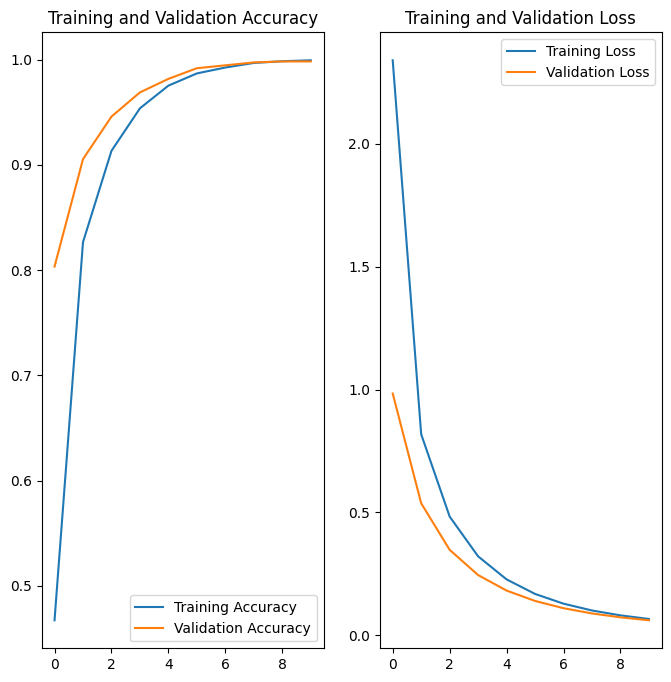

In [28]:
import matplotlib.pyplot as plt

# Ensure you have the `history` object from model training
# history = model.fit(...)  # Example: this is where you get the `history` object

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs for plotting
EPOCHS = len(acc)

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()


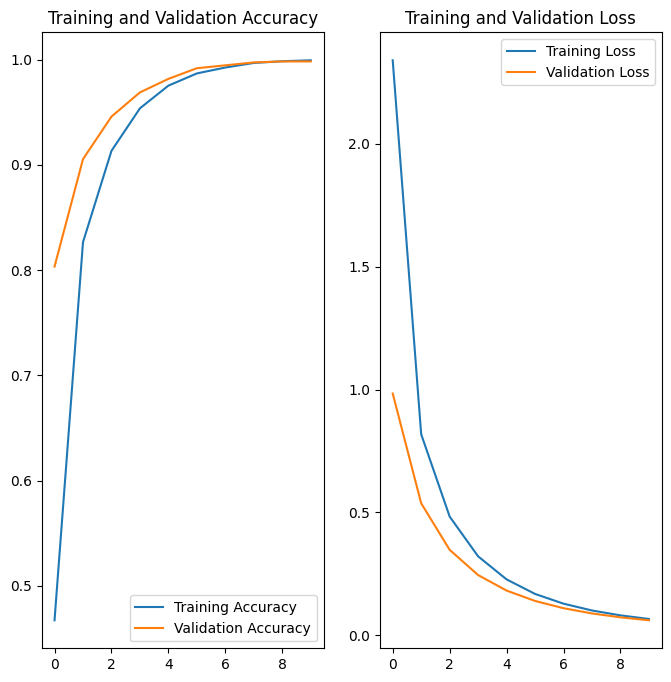

Model saved as Model_Mobilenet.h5


In [30]:
import matplotlib.pyplot as plt

# Ensure you have the `history` object from model training
# history = model.fit(...)  # Example: this is where you get the `history` object

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs for plotting          
EPOCHS = len(acc)

plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plots
plt.show()

# Save the model (no need for Google Colab download)
model.save("Model_Mobilenet.h5")
print("Model saved as Model_Mobilenet.h5")


# **Prediction**

In [ ]:
input_image_path = r'C:\Users\kanya\Downloads\alove.webp'  # Update with the correct path
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]  # Add batch dimension
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]

# Plot the image and prediction
plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()



In [ ]:
input_image_path = 'AMLA.jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]
plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

In [ ]:
input_image_path = 'Bhringaraj.jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]

plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 195ms/step


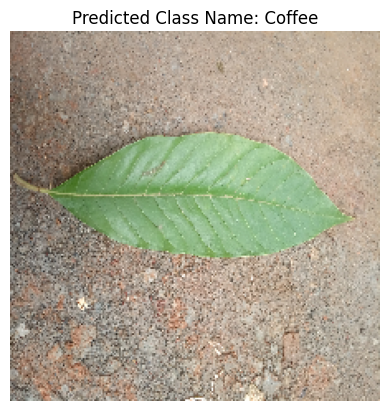

In [ ]:
input_image_path = 'Coffee .jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]

plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()